<h1>Tutorial 1 - Point Processing </h1>

Point processing is a computer vision technique used to improve or modify an image's visual elements, such as brightness, contrast, and color. Mathematical operations on the image's pixel values are applied to images in order to achieve the intended result. <br></br> In this tutorial we will go through some methods used in point processing.

<h4>Import Statements</h4>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

cv2.__version__

'4.7.0'

<h2>Exercise 1 </h2>

Create a function where you can load any image you want. The function should divide the image into four equal segments. 

`Using cv2.imshow('image',img);`

display the image into the 4 separate segments. To crop specific parts of an image you can use img[0:100, 0:100]. This code will crop the image from the 0 to
100 pixels. 





In [2]:
#Function, which loads and divides images in 4 equal segments
def LoadAndSegmentImage(path):
    #Loading Image as GrayScale
    image=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE);

    #Retrieving image dimensions
    height,width = image.shape

    #Displaying Image utilising opencv
    #cv2.imshow('image',image);
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    #Displaying Image using matplotlib
    plt.imshow(image,'gray',vmin=0,vmax=255)
    plt.axis('off')
    
    #Cropping image into 4 separate segments
    Segment1=image[0:int(height/2), 0: int(width/2)]
    Segment2=image[0:int(height/2), int(width/2):width ]
    Segment3=image[int(height/2):height, 0: int(width/2)]
    Segment4=image[int(height/2):height, int(width/2):width ]
    return Segment1,Segment2,Segment3,Segment4

### Loading and Displaying Image

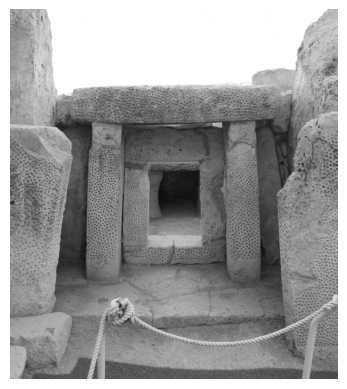

In [3]:
#Image Path
image_path="image1.jpeg"
#Calling Function to Load and Segment Image into 4 parts
Segment1,Segment2,Segment3,Segment4=LoadAndSegmentImage(image_path)

### Displaying First Segment of Image

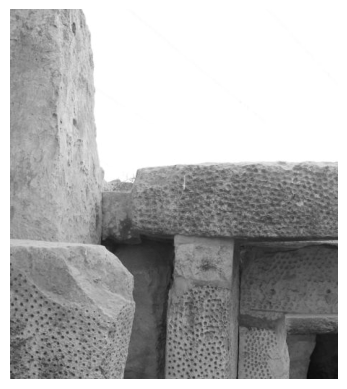

In [4]:
#Displaying Image utilising opencv
#cv2.imshow('Segment1',Segment1);
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Displaying Image using matplotlib
plt.imshow(Segment1,'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

### Displaying Second Segment of Image

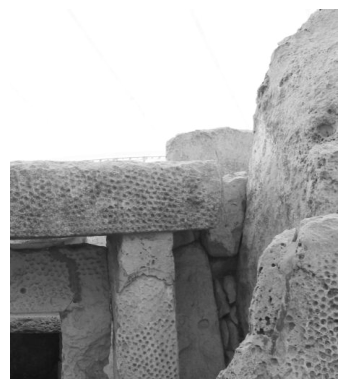

In [5]:
#Displaying Image utilising opencv
#cv2.imshow('Segment2',Segment2);
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Displaying Image using matplotlib
plt.imshow(Segment2,'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

### Displaying Third Segment of Image

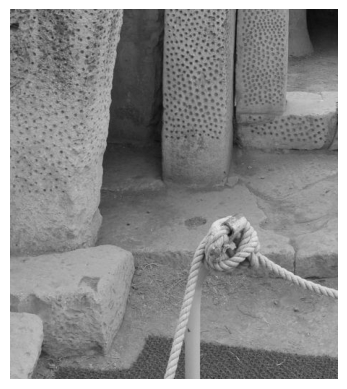

In [6]:
#Displaying Image utilising opencv
#cv2.imshow('Segment3',Segment3);
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Displaying Image using matplotlib
plt.imshow(Segment3,'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

### Displaying Fourth Segment of Image

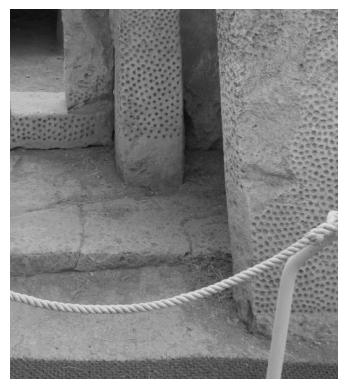

In [7]:
#Displaying Image utilising opencv
#cv2.imshow('Segment4',Segment4);
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#Displaying Image using matplotlib
plt.imshow(Segment4,'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

In [8]:
#Saving segments in an array
segments=[Segment1 ,Segment2 ,Segment3 ,Segment4]

<h2>Exercise 2</h2>

For each of the segments obtained in exercise one, apply a thresholding function to identify if the segment is a dark region or a light region. You may set an arbitrary value for light and dark. (For example greater than intensity of 127 is light).


### Applying Thresholding on all the Segments

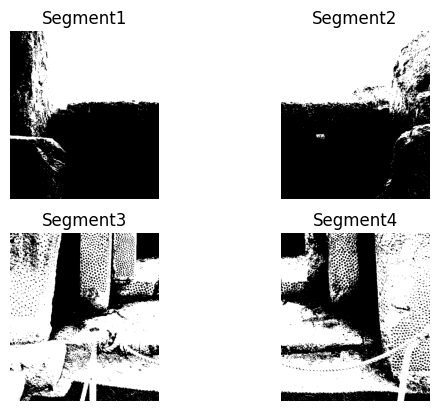

In [9]:
#Applying OTSU thresholding on all the segments
ret,thresh1 = cv2.threshold(Segment1, 127, 255, cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(Segment2, 127, 255, cv2.THRESH_OTSU)
ret,thresh3 = cv2.threshold(Segment3, 127, 255, cv2.THRESH_OTSU)
ret,thresh4 = cv2.threshold(Segment4, 127, 255, cv2.THRESH_OTSU)

#Displaying images utilising matplotlib library
titles = ['Segment1','Segment2','Segment3','Segment4']
segmentsThresholds = [thresh1, thresh2, thresh3, thresh4]
#Looping through all the segments
for i in range(len(segmentsThresholds)):
    #Showing images
    plt.subplot(2,2,i+1),plt.imshow(segmentsThresholds[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis("off")
plt.show()

**Observations:**
 - In this case a thresholding of 127 was used, however applying a larger threshold value for example 200, would increase the number of black pixels, whilst applying a smaller threshold value for example 0, would increase the number of white pixels.
 

<h2>Exercise 3</h2>

Now that you have identified which segments in your image are light or dark. Generate a histogram (between 0 and 255 using bins of 1) for each segment. Compare the segments using the histograms.

In [10]:
#Function which generates the Histogram given a list of images, and histogram titles
def GenerateHistograms(imagelist,titlelist):
    #Looping through all the images
    for i in range(len(imagelist)):
        #Generating Histogram for current image
        hist = cv2.calcHist([imagelist[i]],[0],None,[256],[0,256])
        #Plotting Histograms
        plt.subplot(2,2,i+1),plt.plot(hist, color='b')
        plt.title(titlelist[i])
        plt.xticks([]),plt.yticks([])
        
    plt.show()

### Generating Histograms for all the Segments

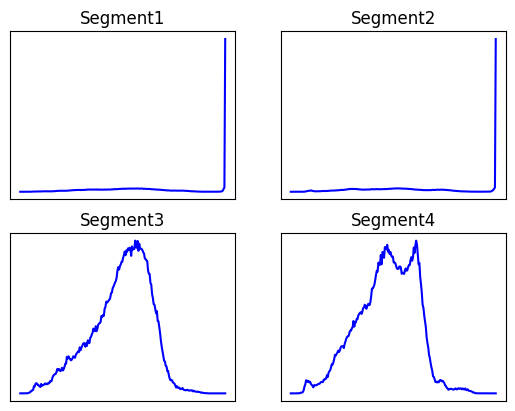

In [11]:
GenerateHistograms(segments,["Segment1","Segment2","Segment3","Segment4"])

### Generating Histograms for all the Segments after applying Thresholding

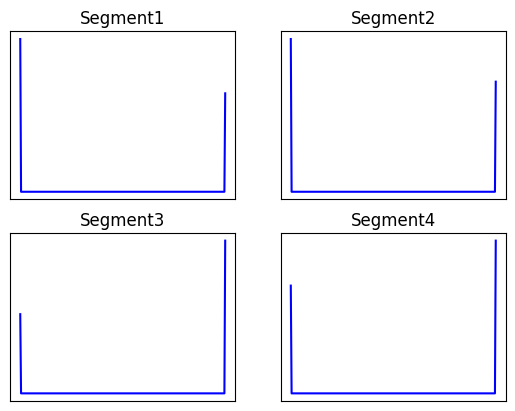

In [12]:
GenerateHistograms(segmentsThresholds,["Segment1","Segment2","Segment3","Segment4"])

**Observations:**
 - The histograms, shows a graphical repreresentation of the number of pixels in the image, and the intensity of each pixel, the grayscale image has a distributed histogram, however the thresholded image has 2 lines on the histogram which denote the number of black and white pixels. 

<h2>Exercise 4</h2>

Power transform can be used to darken or lighten an image. Create a function that applies power transform to an image. Your function should allow for variability in the value Gamma. Load the segments from the previous exercises and apply power transform to lighten the segments or darken the segments. Compare the transformed segment with the normal segment using histograms.

In [13]:
#Function which applies a transformation to an image, given a gamma intensity and image
def PowerTransform(gammaIntensity1,gammaIntensity2,image):
    #Appling Power Transform
    Segment_gamma1= np.array(255*(image/255)**gammaIntensity1,dtype='uint8')
    Segment_gamma2= np.array(255*(image/255)**gammaIntensity2,dtype='uint8')
    #Displaying Images using matplotlib
    titles = ['Gamma Intensity 1','Gamma Intensity 2','Normal Image']
    images = [Segment_gamma1,Segment_gamma2,image]
    for i in range(len(images)):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
        plt.axis('off')
    #Returning Image
    return Segment_gamma1,Segment_gamma2

### Applying Power Transform and Generating Histograms on the First Segment

#### Gamma Intensity 1 = 2.2
#### Gamma Intensity 2 = 0.4

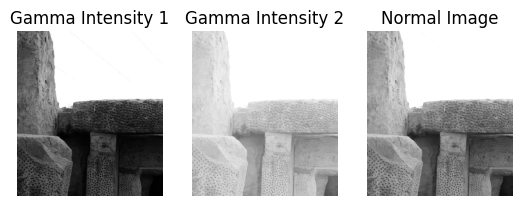

In [14]:
Segment1_gamma1,Segment1_gamma2=PowerTransform(2.2,0.4,Segment1)

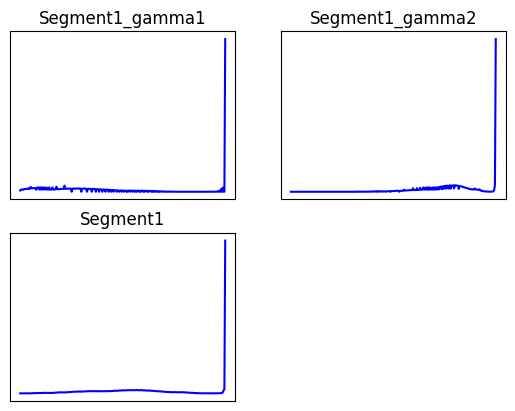

In [15]:
GenerateHistograms([Segment1_gamma1,Segment1_gamma2,Segment1],["Segment1_gamma1","Segment1_gamma2","Segment1"])

### Applying Power Transform and Generating Histograms on the Second Segment

#### Gamma Intensity 1 = 2.2
#### Gamma Intensity 2 = 0.4

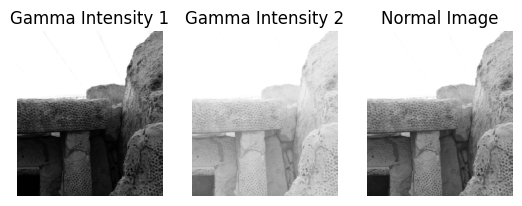

In [16]:
Segment2_gamma1,Segment2_gamma2=PowerTransform(2.2,0.4,Segment2)

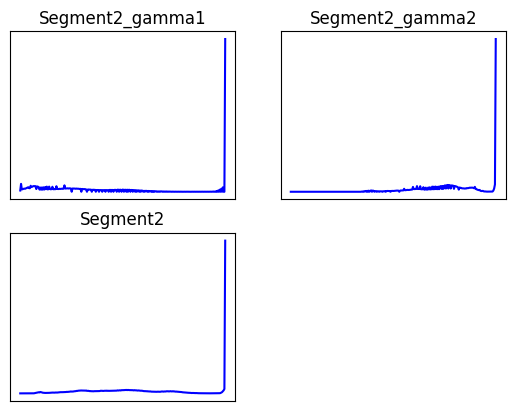

In [17]:
GenerateHistograms([Segment2_gamma1,Segment2_gamma2,Segment2],["Segment2_gamma1","Segment2_gamma2","Segment2"])

### Applying Power Transform and Generating Histograms on the Third Segment

#### Gamma Intensity 1 = 2.2
#### Gamma Intensity 2 = 0.4

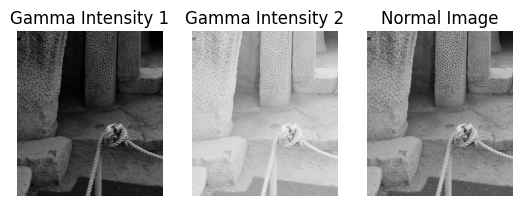

In [18]:
Segment3_gamma1,Segment3_gamma2=PowerTransform(2.2,0.4,Segment3)

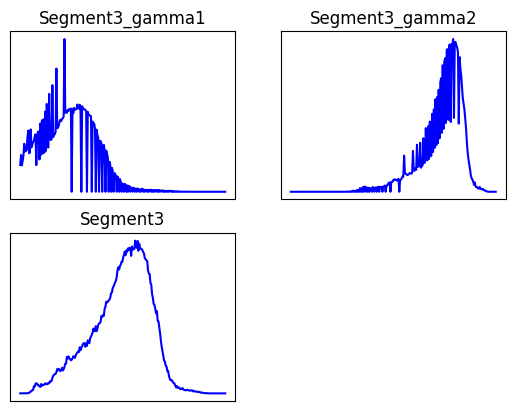

In [19]:
GenerateHistograms([Segment3_gamma1,Segment3_gamma2,Segment3],["Segment3_gamma1","Segment3_gamma2","Segment3"])

### Applying Power Transform and Generating Histograms on the Fourth Segment

#### Gamma Intensity 1 = 2.2
#### Gamma Intensity 2 = 0.4

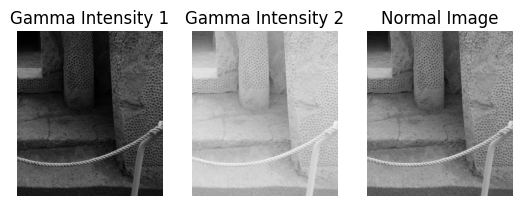

In [20]:
Segment4_gamma1,Segment4_gamma2=PowerTransform(2.2,0.4,Segment4)

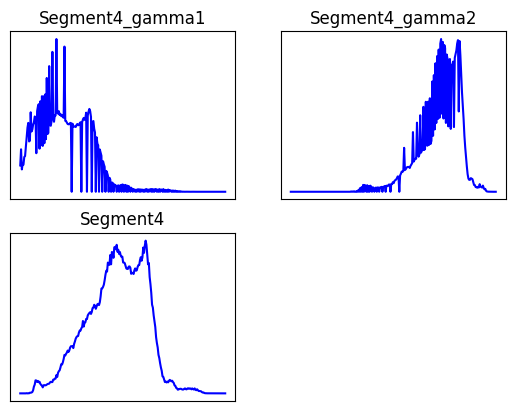

In [21]:
GenerateHistograms([Segment4_gamma1,Segment4_gamma2,Segment4],["Segment4_gamma1","Segment4_gamma2","Segment4"])

**Observations:**
 - Setting the Gamma Intensity to a low value for example 0.4, would make the image look brighter, whilst setting the Gamma Intensity to a large value for example 2.2, would make the image look darker. This can also be seen reflected in the histograms distribution. 

<h2>Exercise 5</h2>

Repeat the previous exercise but replace the Power Transform function with bitwise-splicing.

In [22]:
#Method which converts the passed value into an 8 bit binary value 
def covertBinary(num):
    #Changing bits to binary
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]

    #Setting the remaining 8-bit digits to 0
    for k in range(8 - len(binary_num)):
        binary_num.insert(0,0)
    return binary_num

#Method which converts the passed binary value into its decimal equivalent
def convertDecimal(inputlist):
    x = 0
    #Summing up the total binary powers
    for j in range(8):
        x = x + int(inputlist[j])*(2**(7-i))
    return x

#Method which produces the different bitwise images
def BitwiseSplicing(bit,image):
    #Retrieving image dimensions
    height, width = image.shape
    #Creating an array of 0s to serve as the spliced image base 
    zeros = np.zeros([height,width])
    #Looping through the image pixel values and setting the respective pixel intensity
    for i in range(height): 
        for j in range(width):
            #Converting Pixel to binary value
            x = covertBinary(image[i][j])
            for k in range(8):
                #Depending on the bit, setting the respective pixel value
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0

            #Converting Pixel to decimal value
            decimalValue = convertDecimal(x)

            #Assigning the intensity value
            zeros[i][j] = decimalValue
    #Returning zeros
    return zeros

### Applying Bitwise Splicing on all Segments

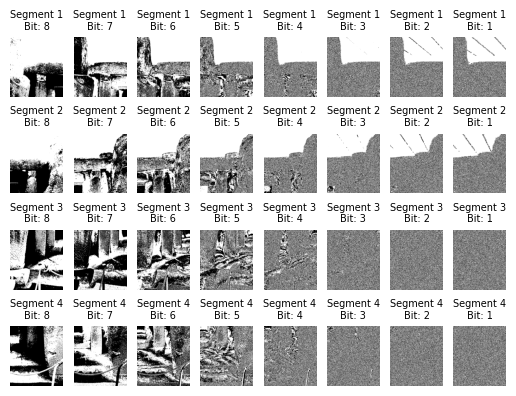

In [23]:
#Plotting the different bitwise splicing images
#Looping through all the segments
imageCounter = 1
for s in range(len(segments)):
    #Looping for every bit
    for k in range(1, 9):
        #Performing bitwise splicing on every segment, and showing result
        plt.subplot(4,8,imageCounter),plt.imshow(BitwiseSplicing(k-1,segments[s]), cmap='gray')
        #Plotting image title
        plt.title("Segment " + str(s+1) + "\nBit: " + str(9-k), size=7)
        plt.axis('off')
        imageCounter += 1
        
plt.show(block=True)

**Observations:**
 - From the above diagram, one can deduce that the different bits which each pixel of each image is composed, have a different degree of importance. As can be seen above, the higher the bit, the clearer the image, and the lower the bit, the more blurred the image would be.

<h2>Exercise 6</h2>

Now that you have experimented with different point processing techniques and compared the results using histograms. Let’s apply these techniques tovideo (hopefully in real-time) 

<ol>
  <li>Divide the webcam frame into four equal segments</li>
  <li>Using thresholds record which segments are darker.</li>
  <li>Apply Power Transform to lighten the darker segments.</li>
  <li>Compare the results using histograms (the graph should update as the frames are loading)</li>
</ol>

### Function which modifies current Frame

In [24]:
#Function, which loads and divides frame in 4 equal segments
def ModifyCurrentFrame(image, gammaIntensity):
    #Transforming Image to GrayScale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Retrieving image dimensions
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
    #Cropping image into 4 separate segments
    Segment1=grayscale[0:int(height/2), 0: int(width/2)]
    Segment2=grayscale[0:int(height/2), int(width/2):int(width)]
    Segment3=grayscale[int(height/2):int(height), 0: int(width/2)]
    Segment4=grayscale[int(height/2):int(height), int(width/2):int(width)]
    
    #Applying OTSU thresholding on all the segments
    ret,thresh1 = cv2.threshold(Segment1, 127, 255, cv2.THRESH_OTSU)
    ret,thresh2 = cv2.threshold(Segment2, 127, 255, cv2.THRESH_OTSU)
    ret,thresh3 = cv2.threshold(Segment3, 127, 255, cv2.THRESH_OTSU)
    ret,thresh4 = cv2.threshold(Segment4, 127, 255, cv2.THRESH_OTSU)
    
    #Appling Power Transform on all segments
    Segment_gamma1= np.array(255*(Segment1/255)**gammaIntensity,dtype='uint8')
    Segment_gamma2= np.array(255*(Segment2/255)**gammaIntensity,dtype='uint8')
    Segment_gamma3= np.array(255*(Segment3/255)**gammaIntensity,dtype='uint8')
    Segment_gamma4= np.array(255*(Segment4/255)**gammaIntensity,dtype='uint8')
    
    #Concatinating GrayScale Segments Horizontally
    grayscaleHorizontal1 = np.concatenate((Segment1, Segment2), axis=1)
    grayscaleHorizontal2 = np.concatenate((Segment3, Segment4), axis=1)
    #Concatinating GrayScale Horizontal Segments Vertically
    grayscaleVertical = np.concatenate((grayscaleHorizontal1, grayscaleHorizontal2), axis=0)
    
    #Concatinating Thresholded Segments Horizontally
    thresholdedHorizontal1 = np.concatenate((thresh1, thresh2), axis=1)
    thresholdedHorizontal2 = np.concatenate((thresh3, thresh4), axis=1)
    #Concatinating Thresholded Horizontal Segments Vertically
    thresholdedVertical = np.concatenate((thresholdedHorizontal1, thresholdedHorizontal2), axis=0)
    
    #Concatinating Power Transform Segments Horizontally
    powerTransformHorizontal1 = np.concatenate((Segment_gamma1, Segment_gamma2), axis=1)
    powerTransformHorizontal2 = np.concatenate((Segment_gamma3, Segment_gamma4), axis=1)
    #Concatinating Power Transform Horizontal Segments Vertically
    powerTransformVertical = np.concatenate((powerTransformHorizontal1, powerTransformHorizontal2), axis=0)

    return grayscaleVertical,thresholdedVertical,powerTransformVertical

### Loading WebCam Footage

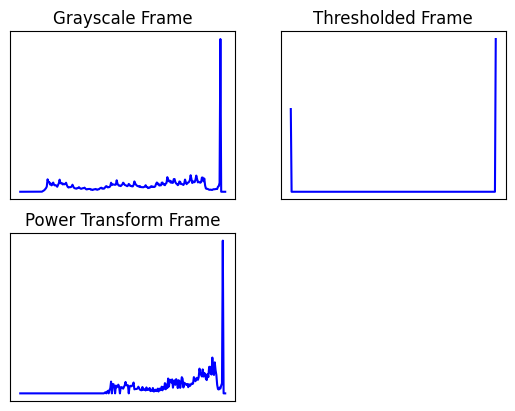

In [ ]:
#Loading WebCam Footage
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    grayscaleVertical,thresholdedVertical,powerTransformVertical=ModifyCurrentFrame(frame,0.4)
    
    #Displaying Frames
    cv2.imshow('Grayscale Frame',grayscaleVertical);
    cv2.imshow('Thresholded Frame',thresholdedVertical);
    cv2.imshow('Power Transform Frame',powerTransformVertical);
    #Skipping some frames to wait
    clear_output(wait=True)
    #Generating Histograms for all the different frames
    GenerateHistograms([grayscaleVertical,thresholdedVertical,powerTransformVertical],["Grayscale Frame","Thresholded Frame","Power Transform Frame"])
    #Press q to escape
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break   
        
cap.release()
cv2.destroyAllWindows()

**Observations:**
 - Note that the web cam frame was segmented into 4 sections, and the power transform and thresholding was applied to the different segments, and finally for the sake of simplicity the segments were all reconstructed back together to give a single output for each transformation and native frame.
 - It was noted that applying thresholding, would degrade the quality of the image, however would also highlight the bright and dark areas of the images, whilst applying power transform would brighten or darken the image.